In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('./datasets/titanic_processed.csv')

In [3]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,2,0,23.0,0,0,13.7917,1,0,0
1,0,1,0,25.0,1,2,151.5500,0,0,1
2,0,3,1,22.0,0,0,7.7958,0,0,1
3,0,3,0,6.0,4,2,31.2750,0,0,1
4,1,3,0,38.0,1,5,31.3875,0,0,1


In [4]:
titanic_df.shape

(712, 10)

In [5]:
from sklearn.model_selection import train_test_split

X = titanic_df.drop(['Survived'],axis=1)
Y = titanic_df['Survived']

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2) 

#train_test_split automatically shuffles the data, but it is always good to shuffle upfront

In [8]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
173,3,0,18.0,0,1,9.3500,0,0,1
403,1,0,52.0,1,0,78.2667,1,0,0
290,3,1,23.5,0,0,7.2292,1,0,0
400,2,0,22.0,1,2,41.5792,1,0,0
286,2,1,57.0,0,0,12.3500,0,1,0


In [9]:
y_train.head()

173    1
403    1
290    0
400    1
286    0
Name: Survived, dtype: int64

In [12]:
x_train.shape,y_train.shape

((569, 9), (569,))

In [11]:
x_test.shape,y_test.shape

((143, 9), (143,))

In [20]:
from sklearn.linear_model import LogisticRegression

logistic_model= LogisticRegression(penalty='l2' , C=1.0, solver ='liblinear').fit(x_train,y_train)

<b><u>penalty :</u></b> 

       l2 is the default value used under the hood by logistic regression estimator.
   
      This implies that we are regularizing the model by applying a penalty on models that are overly complex.
  
      Regularization is a method used in Machine learning penalize complex models so that the resulting model is more robust and better for prediction.
      
      Regularizations are techniques used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting.
       
  
       There are different types of penalties that you could choose to apply. L1 and L2 are the options here. the l2 penalty uses the L2 norm of the coefficients of your model as the penalty function.
   
       The L2 norm is simply the sum of the squares of the coeffients. When you use a regularized model, u can use C to specify the strength of regularization.  
    

<b><u> c : </u></b>


       stands for inverse of regularization strength. smaller values indicate stronger regularization.
    
<b><u> solver :</u></b> 

       Behind the scenes, the logistic regression estimator uses an optimization problem to fit your model. The algorith liblinear indicates the kind of optimization thatlogistic regression performs
    
           -- Liblinear works very well for smaller datasets.
    
       Fit function will start the traininmg process. Once your model has completed training, you can use it foir predictions on your test data. call predict on you fully trainedf log-regg model and passin the features for your test data.

Regularization is a very important technique in machine learning to prevent overfitting. Mathematically speaking, it adds a regularization term in order to prevent the coefficients to fit so perfectly to overfit. The difference between the L1 and L2 is just that L2 is the sum of the square of the weights, while L1 is just the sum of the weights. As follows:

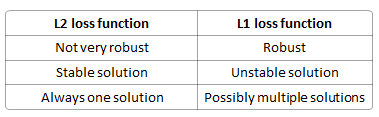

In [21]:
y_pred = logistic_model.predict(x_test)

In [22]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [24]:
pred_results = pd.DataFrame({'y_test' : y_test,
                           'y_pred' : y_pred})

In [26]:
pred_results.sample(10)

,y_test,y_pred
388,0,1
302,1,1
583,0,0
527,0,0
71,0,0
668,0,0
221,1,1
33,1,0
170,0,0
41,0,0


### Performance

#### <u>Confusion Matrix</u>

In [30]:
confu_crosstab = pd.crosstab(pred_results.y_test,pred_results.y_pred)
confu_crosstab

y_pred,0,1
y_test,,
0,77,15
1,17,34


Most of the values are in the True Positive & True Negative cells indicating that the accuracy of the model is pretty high

There are of course a few FALSE POSITIVES AND FALSE NEGATIVES.

But we only be able able to identify the models actual performance by using the rigjht metrics

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [54]:
acc = accuracy_score(y_test,y_pred)
preci = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print("Accuracy  : ", round(acc*100,2))
print("Precision : ", round(preci*100,2))
print("Recall    : ", round(recall*100,2))

Accuracy  :  77.62
Precision :  69.39
Recall    :  66.67


All the values are fairly high . In general a binary classifier model should have an accuracy over 50%. Because 50% accuracy is what you get when you guess at random.

Accuracy is 78% . It shows how many of the predicted values did our model get right.

Precision : 69%  => How many of the passengers the model thought survived actually survived ? 

Recall : 67% => How many of the actual survivors did the model correctly predict ?

Low recall score indicates that there were many false negatives in our prediction. 

Accuracy, Precision and recall can be easily calculated using confusion matrix

In [40]:
confu_crosstab

y_pred,0,1
y_test,,
0,77,15
1,17,34


In [49]:
TP = confu_crosstab[1][1] # actually : survived  & model: survived
FP = confu_crosstab[1][0] # actually : !survived & model: survived
FN = confu_crosstab[0][1] # actually : survived  & model: !survived
TN = confu_crosstab[0][0] # actually : !survived & model: !survived

In [52]:
acc_verif = (TP+TN)/(TP+FP+TN+FN) 
round(acc_verif*100,2) #same score

77.62

In [56]:
pre_verif = (TP)/(TP+FP)
round(pre_verif*100,2)

69.39

In [57]:
rec_verif = TP / (TP+FN)
round(rec_verif*100,2)

66.67